# Detecting Fraud in Credit card transactions using Machine Learning Algorithms 

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sklearn
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [4]:
import scipy
from pylab import rcParams

rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [5]:
# Reading Dataset from Kaggle 
df = pd.read_csv('credit card data.csv')

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### *Class value 1 indicates a Fraud in transaction and 0 indicates a normal transaction*

In [7]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

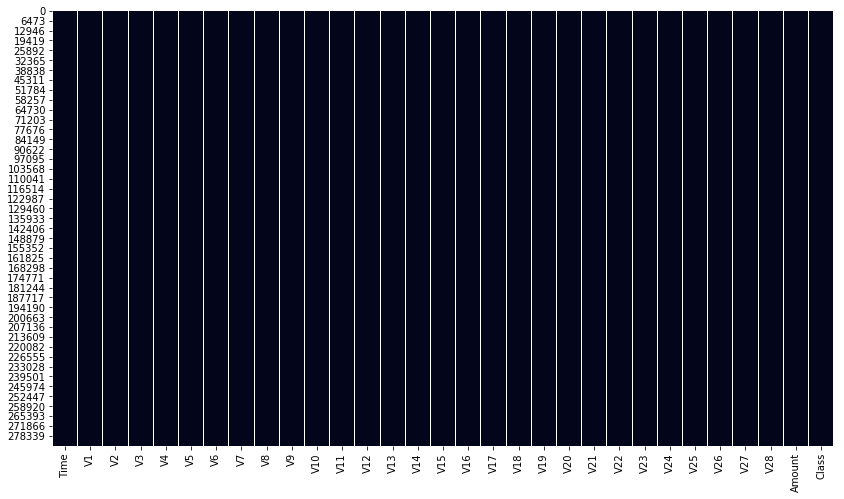

In [10]:
sns.heatmap(df.isnull(), cbar=False)

So, there are no null values present in the dataset !

In [7]:
count_classes = pd.value_counts(df['Class'], sort = True)

In [8]:
count_classes

0    284315
1       492
Name: Class, dtype: int64

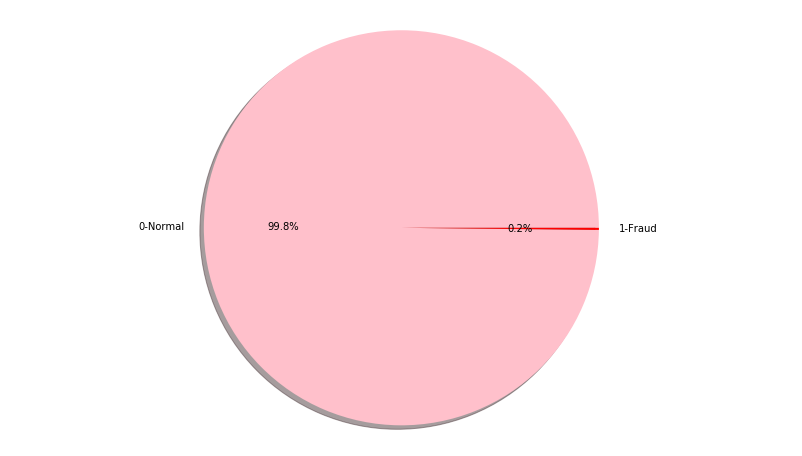

In [61]:
labels = '0-Normal', '1-Fraud'
size =[284315, 492]
fig,ax=plt.subplots()
ax.pie(size, labels=labels,autopct='%1.1f%%', shadow=True, colors = ['pink', 'red'])
ax.axis('equal')
plt.show()

Hence, we can see that it is an imbalanced Dataset !

In [9]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

In [63]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [64]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [65]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

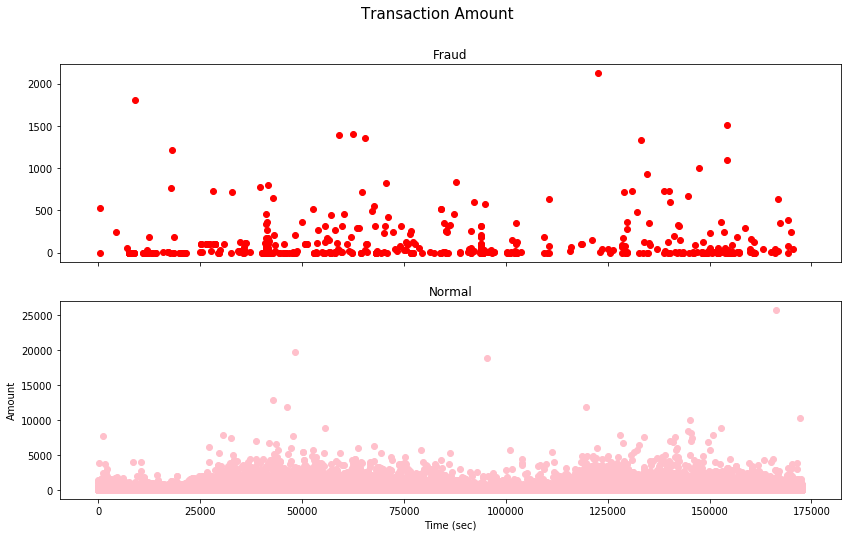

In [83]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Transaction Amount', size =15)
ax1.scatter(fraud.Time, fraud.Amount, color = 'red')
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount, color = 'pink')
ax2.set_title('Normal')
plt.xlabel('Time (sec)')
plt.ylabel('Amount')
plt.show()

### DATA Preprocessing

In [10]:
# Taking sample of data for pre-processing

df_sample= df.sample(frac = 0.1,random_state=1)
df_sample.shape

(28481, 31)

In [11]:
# NO. of Fraud and Normal Transactions in this sample dataset

Fraud = df_sample[df_sample['Class']==1]
Valid = df_sample[df_sample['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [12]:
print(outlier_fraction)
print("No. of Fraud Cases : {}".format(len(Fraud)))
print("No. of Normal Cases : {}".format(len(Valid)))

0.0017234102419808666
No. of Fraud Cases : 49
No. of Normal Cases : 28432


### Making Heatmap for Correlation

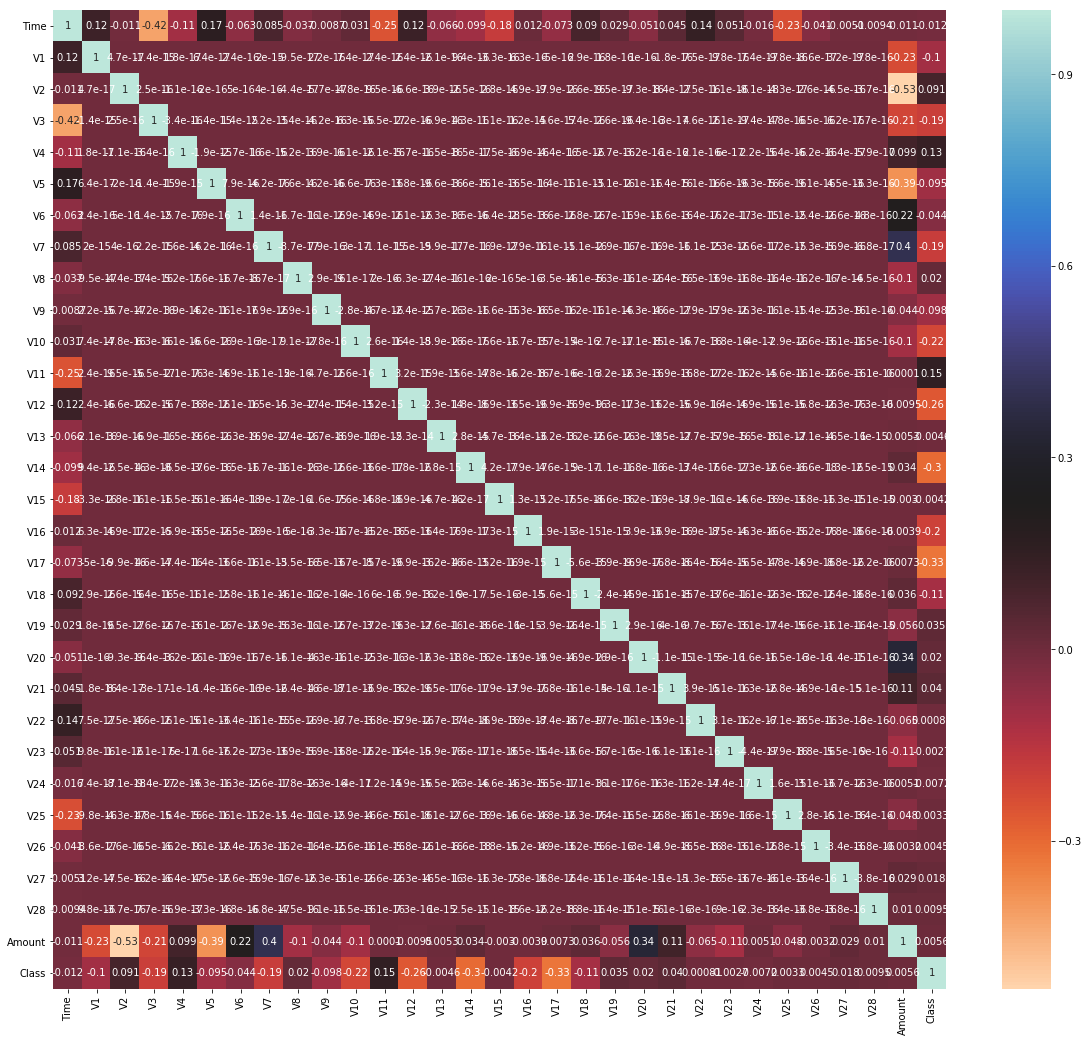

In [100]:
corrmat = df_sample.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,18))

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="icefire_r")

### Creating Independent and Dependent features

In [13]:
columns = df_sample.columns.tolist()
columns = [c for c in columns if c not in ["Class"]]

target = "Class"

state = np.random.RandomState(42)

X = df_sample[columns]
Y = df_sample[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


***

# Using Machine Learning Algorithms for Prediction :

## Isolation Forest Algorithm :
#### *The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.*

## LOC (Local Outlier Factor) Algorithm :
#### *An Unsupervised outlier detection method that computes local density deviation of a given data point with respect to its neighbors.*

## SVM (Support Vector Machines) Algorithm :
#### A Supervised Machine Learning models with associated learning algorithms that analyze the data for both Regression and Classification model analysis

---

In [14]:
classifiers = {
   
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), contamination=outlier_fraction,random_state=state, verbose=0),
   
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=30, metric='minkowski',p=2, metric_params=None, contamination=outlier_fraction),
    
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, max_iter=-1)
   
}

## Predicting...

In [24]:
n_outliers = len(fraud)


for i, (clf_name,clf) in enumerate(classifiers.items()):

    if clf_name == "Local Outlier Factor Algorithm":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
        
    elif clf_name == "Support Vector Machine Algorithm":
        clf.fit(X)
        y_pred = clf.predict(X)
        
    else:    
        clf = LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=0.1)
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)

        
#Reshaping prediction values to 0-Normal and 1-Fraud

    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    
    
# CLASSIFICATION REPORT :

    print("{}: {}".format(clf_name,n_errors))
    
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 2571
Accuracy Score :
0.9097292932130192
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     28432
           1       0.00      0.16      0.01        49

    accuracy                           0.91     28481
   macro avg       0.50      0.54      0.48     28481
weighted avg       1.00      0.91      0.95     28481

Local Outlier Factor: 2571
Accuracy Score :
0.9097292932130192
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     28432
           1       0.00      0.16      0.01        49

    accuracy                           0.91     28481
   macro avg       0.50      0.54      0.48     28481
weighted avg       1.00      0.91      0.95     28481

Support Vector Machine: 2571
Accuracy Score :
0.9097292932130192
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.9

In [25]:
n_outliers = len(fraud)


for i, (clf_name,clf) in enumerate(classifiers.items()):

    if clf_name == "Local Outlier Factor Algorithm":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
        
    elif clf_name == "Support Vector Machine Algorithm":
        clf.fit(X)
        y_pred = clf.predict(X)
        
    else:    
        clf = LocalOutlierFactor(novelty=True)
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)

        
#Reshaping prediction values to 0-Normal and 1-Fraud

    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    
    
# CLASSIFICATION REPORT :

    print("{}: {}".format(clf_name,n_errors))
    
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 2947
Accuracy Score :
0.896527509567782
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     28432
           1       0.00      0.24      0.01        49

    accuracy                           0.90     28481
   macro avg       0.50      0.57      0.48     28481
weighted avg       1.00      0.90      0.94     28481

Local Outlier Factor: 2947
Accuracy Score :
0.896527509567782
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     28432
           1       0.00      0.24      0.01        49

    accuracy                           0.90     28481
   macro avg       0.50      0.57      0.48     28481
weighted avg       1.00      0.90      0.94     28481

Support Vector Machine: 2947
Accuracy Score :
0.896527509567782
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.90  